In [2]:
from __future__ import division
import json
from operator import itemgetter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from ttp import ttp
import nltk, string
from nltk.book import *
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
from __future__ import unicode_literals, print_function
import requests

read in data file

In [4]:
with open("timelines_golden_globes_tv_short.json") as f:
    tv_short = json.load(f)

tweets = [" ".join([tweet["text"] for tweet in people])
          for people in tv_short]

len(tweets)

30

In [5]:
all_tweets = " ".join(tweets)
type(all_tweets)

str

# Basic Info

In [6]:
tcount = [len(tv_short[i]) for i in range(len(tv_short))]
screen_names = [tv_short[i][0]["user"]["screen_name"] for i in range(len(tv_short))]
names = [tv_short[i][0]["user"]["name"] for i in range(len(tv_short))]
earlist_tweet = [tv_short[i][tcount[i]-1]["created_at"] for i in range(len(tv_short))]
statuscounts = [tv_short[i][0]["user"]["statuses_count"] for i in range(len(tv_short))]

In [31]:
screen_names

['ItsRamiMalek',
 'mrbobodenkirk',
 'LievSchreiber',
 'caitrionambalfe',
 'violadavis',
 'TherealTaraji',
 'RealRobinWright',
 'azizansari',
 'RobLowe',
 'SirPatStew',
 'jeffreytambor',
 'Racheldoesstuff',
 'jamieleecurtis',
 'OfficialJLD',
 'HereIsGina',
 'LilyTomlin',
 'idriselba',
 'patrickwilson73',
 'kirstendunst',
 'ladygaga',
 'SarahEllenHay',
 'FelicityHuffman',
 'IAMQUEENLATIFAH',
 'Alancumming',
 'TobiasMenzies',
 'ChristianSlater',
 'UzoAduba',
 'JoFroggatt',
 'ReginaKing',
 'JudithLight']

# Functions: tags, urls, users mentioned, replies

In [8]:
p = ttp.Parser()
result = p.parse(tweets[0])
replies = result.reply
users_mentioned = result.users
tags = result.tags
urls = result.urls

In [9]:
def get_shortlinks(shortlinks):
    urls = []
    for shortlink in shortlinks:
        try:
            request_results = requests.get(shortlink)
            urls.append(request_results.url)
        except Exception:
            pass
    return urls

In [10]:
def unshorten_links(shortlinks):
    urls = []
    for shortlink in shortlinks:
        try:
            request_results = requests.head(shortlink, allow_redirects=True)
            urls.append(request_results.url)
        except Exception:
            pass
    return urls

In [11]:
def get_url(text):
    p = ttp.Parser()
    result = p.parse(text)
    return unshorten_links(result.urls)

In [74]:
unshortened = get_url(tweets[0])
unshortened[0:5]

['https://twitter.com/ItsRamiMalek/status/691247361096564741/photo/1',
 'https://twitter.com/ItsRamiMalek/status/688889561183682560/photo/1',
 'https://twitter.com/ItsRamiMalek/status/688453210827169796/photo/1',
 'https://twitter.com/ItsRamiMalek/status/687760364809879553/video/1',
 'https://twitter.com/ItsRamiMalek/status/687139988467650561/photo/1']

In [12]:
from urllib.parse import urlparse
def host_stat(urls):
    hostnames = [urlparse(i).hostname for i in urls]
    freq_host = FreqDist(hostnames)
    list_host = [(k,v) for k,v in freq_host.items()]
    host_stat = sorted(list_host, key=lambda el: -el[1])
    name_stat = [(re.split('\.', i[0])[-2], i[1]) for i in host_stat]
    return host_stat, name_stat

In [160]:
hosts = host_stat(unshortened)
hosts[1][0:5]

[('twitter', 81),
 ('usanetwork', 13),
 ('t', 4),
 ('hollywoodreporter', 4),
 ('instagram', 3)]

In [13]:
def get_users_mentioned(text):
    p = ttp.Parser()
    result = p.parse(text)
    fdist_users = FreqDist(result.users)
    list_users = [(k,v) for k,v in fdist_users.items()]
    sorted_users = sorted(list_users, key=lambda el: -el[1])
    return sorted_users

In [14]:
get_users_mentioned(tweets[0])[0:5]

[('whoismrrobot', 9),
 ('ChristianSlater', 6),
 ('ItsRamiMalek', 6),
 ('carlychaikin', 5),
 ('PortiaDd', 4)]

In [15]:
def get_reply(text):
    p = ttp.Parser()
    result = p.parse(text)
    fdist_reply = FreqDist(result.reply)
    list_reply = [(k,v) for k,v in fdist_reply.items()]
    sorted_reply = sorted(list_reply, key=lambda el: -el[1])
    return sorted_reply

In [16]:
get_reply(tweets[0])[0:5]

[('D', 1), ('r', 1), ('i', 1), ('o', 1)]

In [17]:
def get_tags(text):
    p = ttp.Parser()
    result = p.parse(text)
    fdist_tags = FreqDist(result.tags)
    list_tags = [(k,v) for k,v in fdist_tags.items()]
    sorted_tags = sorted(list_tags, key=lambda el: -el[1])
    return sorted_tags

In [18]:
get_tags(tweets[0])[0:5]

[('MrRobot', 29),
 ('WeArefsociety', 13),
 ('TribecaFilmFestival', 2),
 ('NowPlaying', 2),
 ('fsociety', 2)]

# Examples: Wordcloud

/Users/jorothygong/anaconda/lib/python3.5/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


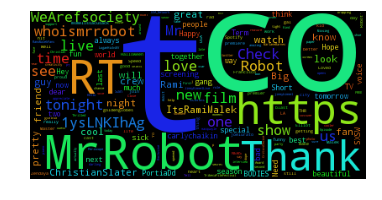

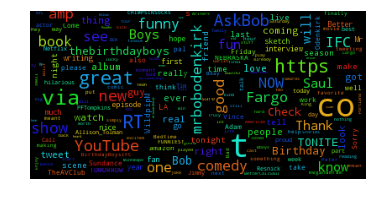

In [14]:
# Generate a word cloud image
wordcloud = WordCloud().generate(tweets[0])

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(tweets[1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
#image = wordcloud.to_image()
#image.show()

/Users/jorothygong/anaconda/lib/python3.5/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


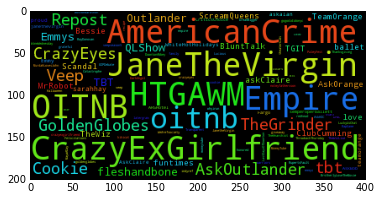

In [30]:
wordcloud = WordCloud().generate_from_frequencies(tags_stat)
plt.imshow(wordcloud)

# Analysis: tags, urls, users mentioned, replies

In [ ]:
url_stat = get_url(all_tweets)

In [22]:
mentioned_stat = get_users_mentioned(all_tweets)

In [23]:
tags_stat = get_tags(all_tweets)

In [27]:
casts_mentioned = [i for i in mentioned_stat if i[0] in set(screen_names)]

# Tokenize

In [ ]:
# word tokenize
word_tokenize('Hello World.')

some opinions: few people use emoticons